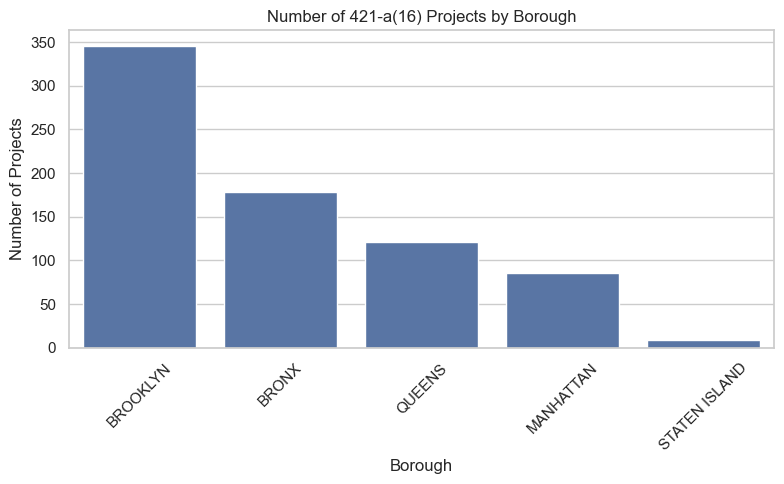

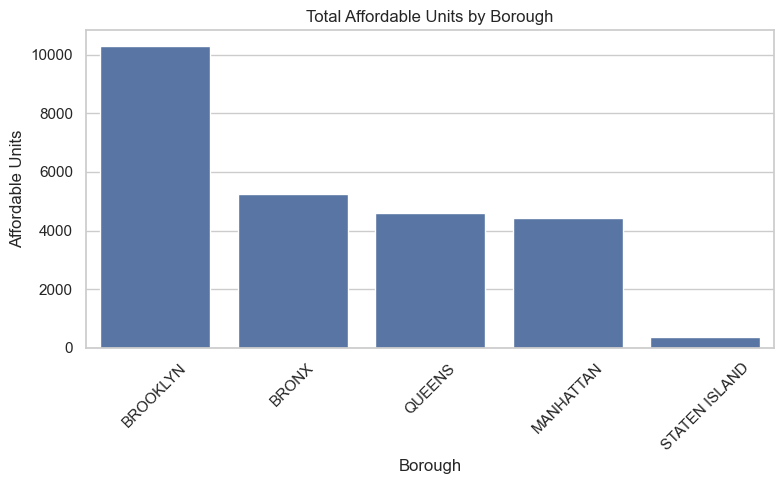

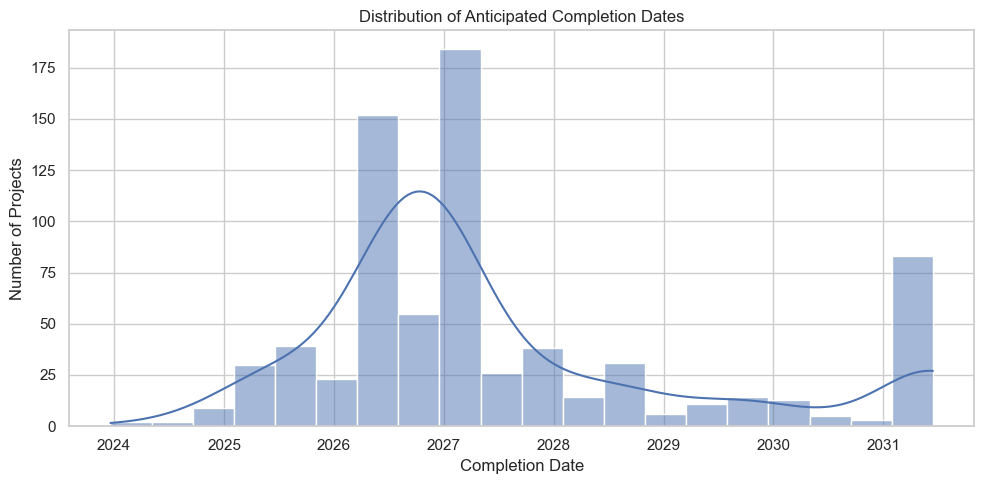

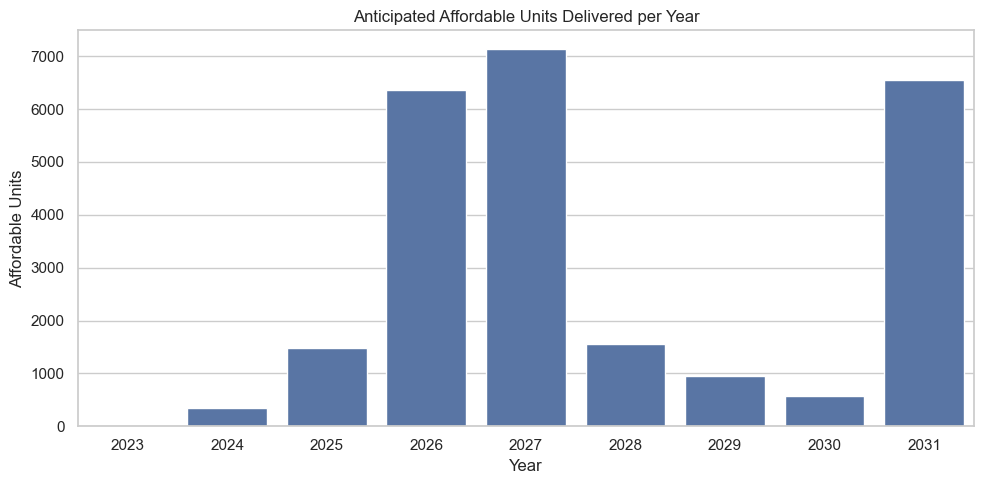

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("421-a_16__Affordable_New_York_Housing_Program_Completion_Extension_-_Letters_of_Intent_20250422.csv")

# Clean and prepare column names
df.columns = df.columns.str.strip().str.upper().str.replace(" ", "_")

# Convert relevant columns
df["REPORTED_AFFORDALE_UNITS"] = pd.to_numeric(df["REPORTED_AFFORDALE_UNITS"], errors="coerce")
df["REPORTED_UNITS"] = pd.to_numeric(df["REPORTED_UNITS"], errors="coerce")
df["REPORTED_ANTICIPATED_COMPLETION_DATE"] = pd.to_datetime(df["REPORTED_ANTICIPATED_COMPLETION_DATE"], errors="coerce")
df["REPORTED_COMMENCEMENT_DATE"] = pd.to_datetime(df["REPORTED_COMMENCEMENT_DATE"], errors="coerce")

# Set visualization style
sns.set(style="whitegrid")

# --- Visualization 1: Number of Projects by Borough ---
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="REPORTED_BOROUGH", order=df["REPORTED_BOROUGH"].value_counts().index)
plt.title("Number of 421-a(16) Projects by Borough")
plt.xlabel("Borough")
plt.ylabel("Number of Projects")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Visualization 2: Total Affordable Units by Borough ---
plt.figure(figsize=(8, 5))
affordable_by_borough = df.groupby("REPORTED_BOROUGH")["REPORTED_AFFORDALE_UNITS"].sum().sort_values(ascending=False)
sns.barplot(x=affordable_by_borough.index, y=affordable_by_borough.values)
plt.title("Total Affordable Units by Borough")
plt.xlabel("Borough")
plt.ylabel("Affordable Units")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Visualization 3: Distribution of Anticipated Completion Dates ---
plt.figure(figsize=(10, 5))
sns.histplot(df["REPORTED_ANTICIPATED_COMPLETION_DATE"].dropna(), bins=20, kde=True)
plt.title("Distribution of Anticipated Completion Dates")
plt.xlabel("Completion Date")
plt.ylabel("Number of Projects")
plt.tight_layout()
plt.show()

# --- Visualization 4: Affordable Units Delivered per Year ---
df["COMPLETION_YEAR"] = df["REPORTED_ANTICIPATED_COMPLETION_DATE"].dt.year
yearly_units = df.groupby("COMPLETION_YEAR")["REPORTED_AFFORDALE_UNITS"].sum().dropna()

plt.figure(figsize=(10, 5))
sns.barplot(x=yearly_units.index, y=yearly_units.values)
plt.title("Anticipated Affordable Units Delivered per Year")
plt.xlabel("Year")
plt.ylabel("Affordable Units")
plt.tight_layout()
plt.show()
